In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

In [18]:
df_desc_null_actions = pd.read_csv("df_null_action.csv", nrows=10000)
df_desc_null_actions['2']

0       NOTICE:  Citation on Petition for Formal Adjud...
1                       Citation Filed; Served as Ordered
2       An Interested Person,Johanna Soris, Asst. Atto...
3        Letters of Authority for Personal Representative
4       NOTICE:  Citation on Petition for Formal Adjud...
                              ...                        
9995    MAGISTRATE TRIAL IN PROGRESS SCHEDULED TO CONT...
9996    Magistrate trial held ( Sargent, Dennis ) (Tap...
9997                      Will dated 1/27/87  --  3 pages
9998           Misc Entry: Letter filed by the defendant.
9999                  Appearance for  filed by Attorney .
Name: 2, Length: 10000, dtype: object

In [19]:
tfidf = TfidfVectorizer(min_df=5, ngram_range=(1,3))

# features = tfidf.fit_transform(dataset['0'].astype('U'))
description_mia_vectorized = tfidf.fit_transform(df_desc_null_actions['2'].astype('U'))
tf_idf_norm = normalize(description_mia_vectorized)
tf_idf_array = tf_idf_norm.toarray()

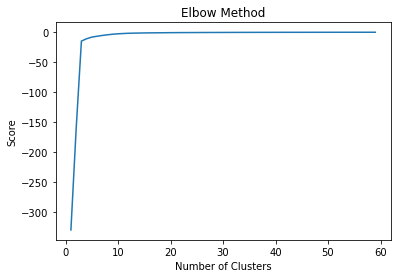

In [24]:
#KMeans in a range of 1 - 60 for number of clusters.
number_clusters = range(1, 60)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

#Y_sklearn is PCA'd data. Done in next cell.
score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [23]:
# Decomposing the tfiff array into two dimensions

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

## Some nebulous error below:
# test_e = kmeans(3, 1, 600)
# fitted = test_e.fit_kmeans(Y_sklearn)
# predicted_values = test_e.predict(Y_sklearn)

# plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

# centers = fitted.centroids
# plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

[[ 0.06585608  0.01498227]
 [ 0.96438123  0.14368244]
 [-0.01855102 -0.00304425]
 ...
 [-0.01689619 -0.01597129]
 [-0.00417619 -0.03932441]
 [ 0.00548694 -0.0297067 ]]
